**Customer Segmentation Analysis**

**Project Description:**

The aim of this data analytics project is to perform customer segmentation analysis for an e-
commerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML_Datasets/data.csv' ,encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.shape

(541909, 8)

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df = df[(df['UnitPrice']> 0) & (df['Quantity']>0)]

In [10]:
df = df.drop_duplicates()

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,524878.000000,524878.000000,392692.000000
mean,10.616600,3.922573,15287.843865
std,156.280031,36.093028,1713.539549
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

In [13]:
df.dropna(inplace=True)  #droping the null values

In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [17]:
df.isetitem(df.columns.get_loc('InvoiceDate'), pd.to_datetime(df['InvoiceDate']))

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Recency**

In [19]:
print(df["InvoiceDate"].max())

most_recent_purchase = df["InvoiceDate"].max()

2011-12-09 12:50:00


In [20]:
df['Recency'] = df['InvoiceDate'].apply(lambda row: (most_recent_purchase - row).days)

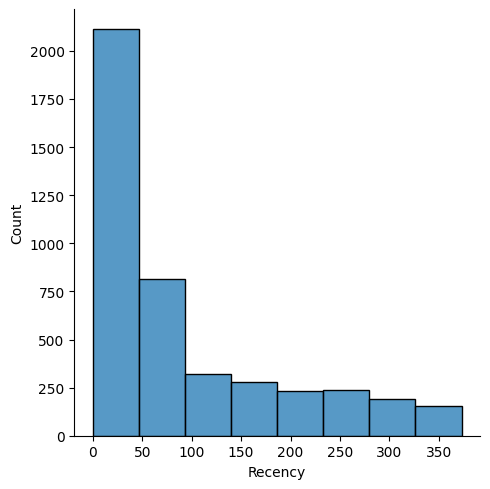

In [21]:
df_recent = df.groupby('CustomerID')['Recency'].min()
sns.displot(df_recent,bins=8)

In [22]:
df_recent.reset_index()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4333,18280.0,277
4334,18281.0,180
4335,18282.0,7
4336,18283.0,3


# **Frequency**

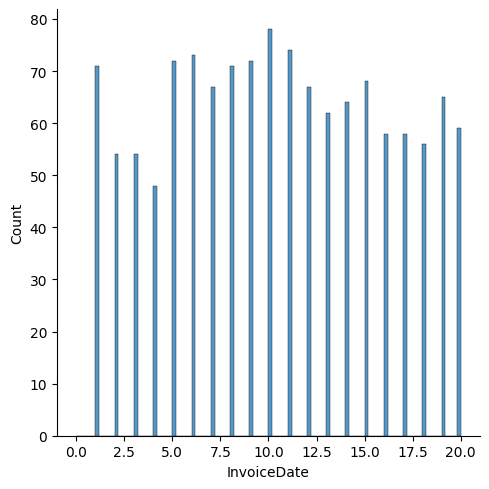

In [23]:
df_freq = df.groupby('CustomerID')['InvoiceDate'].count()
sns.displot(df_freq,bins=100,binrange=(0,20))

In [24]:
nt=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


# **Monetary Value**

In [25]:
df['TotalAmount']= df['Quantity']*df['UnitPrice']
tm=df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
tm

,CustomerID,TotalAmount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


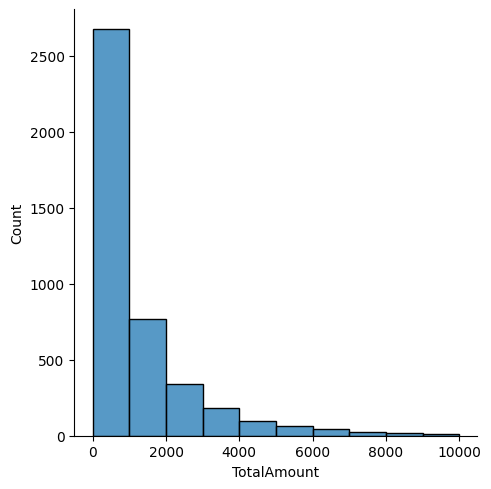

In [26]:
df_monetary = df.groupby('CustomerID')['TotalAmount'].sum()
sns.displot(df_monetary,bins=10,binrange=(0,10000))

In [27]:
df_final=pd.merge(df_recent,df_freq,on='CustomerID')
df_final=pd.merge(df_final,tm,on='CustomerID')
df_final

,CustomerID,Recency,InvoiceDate,TotalAmount
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4333,18280.0,277,10,180.60
4334,18281.0,180,7,80.82
4335,18282.0,7,12,178.05
4336,18283.0,3,721,2045.53


In [28]:
df_final.rename(columns={'InvoiceDate':'Frequency'},inplace=True)

In [29]:
df_final.head()

,CustomerID,Recency,Frequency,TotalAmount
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [30]:
df_final.describe()

,CustomerID,Recency,Frequency,TotalAmount
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.536422,90.523744,2048.688081
std,1721.808492,100.014169,225.506968,8985.230220
min,12346.000000,0.000000,1.000000,3.750000
25%,13813.250000,17.000000,17.000000,306.482500
50%,15299.500000,50.000000,41.000000,668.570000
75%,16778.750000,141.000000,98.000000,1660.597500
max,18287.000000,373.000000,7676.000000,280206.020000


In [31]:
df_final.shape

(4338, 4)

<Axes: xlabel='Recency', ylabel='Frequency'>

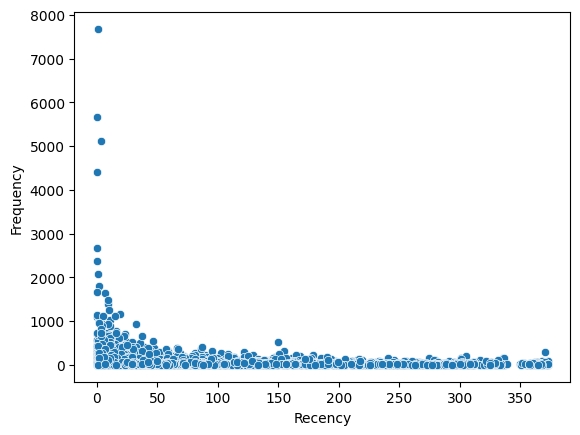

In [32]:
sns.scatterplot(data=df_final, x="Recency", y="Frequency")

<Axes: xlabel='TotalAmount', ylabel='Frequency'>

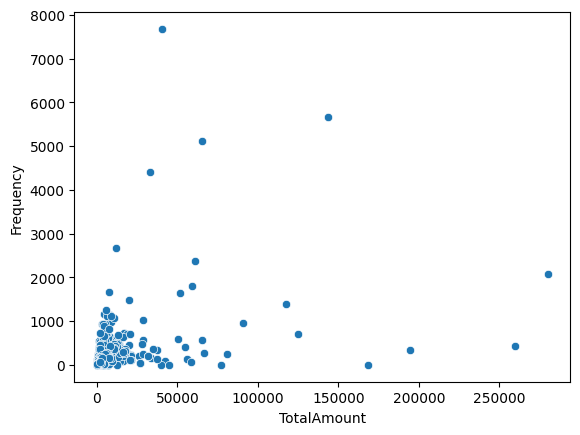

In [33]:
sns.scatterplot(data=df_final, x="TotalAmount", y="Frequency")

In [34]:
from sklearn.preprocessing import StandardScaler

cols = df_final.columns
scaler = StandardScaler()
rfm = scaler.fit_transform(df_final)
df_final_scaled = pd.DataFrame(rfm, columns=[cols])

In [35]:
df_final_scaled.head()

,CustomerID,Recency,Frequency,TotalAmount
0,-1.716073,2.334574,-0.397035,8.363010
1,-1.715492,-0.905340,0.405694,0.251699
2,-1.714911,-0.175360,-0.263986,-0.027988
3,-1.714330,-0.735345,-0.077717,-0.032406
4,-1.713749,2.174578,-0.326075,-0.190812


In [36]:
df_final_scaled.drop('CustomerID',axis= 1,inplace=True)

<ipython-input-36-a30303731ecc>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_final_scaled.drop('CustomerID',axis= 1,inplace=True)


In [37]:
df_final_scaled.head()

,Recency,Frequency,TotalAmount
0,2.334574,-0.397035,8.363010
1,-0.905340,0.405694,0.251699
2,-0.175360,-0.263986,-0.027988
3,-0.735345,-0.077717,-0.032406
4,2.174578,-0.326075,-0.190812


In [38]:
df_final_scaled.describe()

,Recency,Frequency,TotalAmount
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,2.702618e-17,1.474155e-17,2.293130e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-9.153401e-01,-3.970346e-01,-2.276151e-01
25%,-7.453445e-01,-3.260752e-01,-1.939190e-01
50%,-4.153533e-01,-2.196360e-01,-1.536162e-01
75%,4.946227e-01,3.315693e-02,-4.319704e-02
max,2.814561e+00,3.364131e+01,3.096074e+01


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
interia = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i).fit(df_final_scaled)
  interia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [40]:
min(interia), max(interia)

(1494.3218328248388, 13013.999999999993)

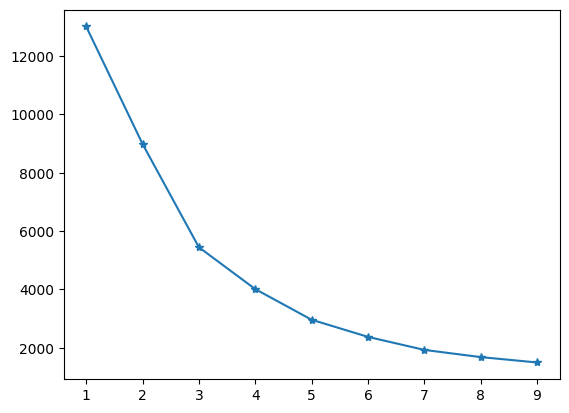

In [41]:
plt.plot(range(1,10), interia, "-*")

In [42]:
print(silhouette_score(df_final_scaled, kmeans.labels_, metric='euclidean'))

0.5214633423717051


In [43]:
ypred = kmeans.predict(df_final_scaled)

In [44]:
df_final_scaled.iloc[ypred == 0, 0].shape == df_final_scaled.iloc[ypred == 0, 1].shape

True

In [45]:
centroids = kmeans.cluster_centers_

In [46]:
x=df_final_scaled

Text(0.5, 1.0, 'Clustering')

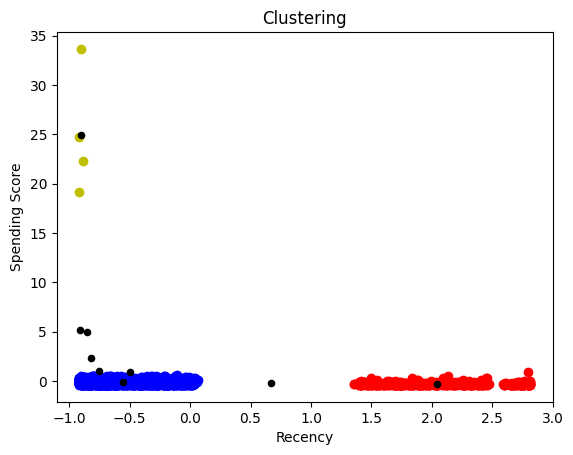

In [47]:
plt.scatter(x.loc[ypred == 0,"Recency"], x.loc[ypred==0, "Frequency"], c = "r", label = "Cluster 1" )
plt.scatter(x.loc[ypred == 1,"Recency"], x.loc[ypred==1, "Frequency"], c = "b",label = "Cluster 2" )
plt.scatter(x.loc[ypred == 2,"Recency"], x.loc[ypred==2, "Frequency"], c = "y" ,label = "Cluster 3")


plt.scatter(centroids[:,0],centroids[:,1], c= "black", s=20, label = "Centroids" )
plt.xlabel("Recency")
plt.ylabel("Spending Score")
plt.title("Clustering")

Text(0.5, 1.0, 'Clustering')

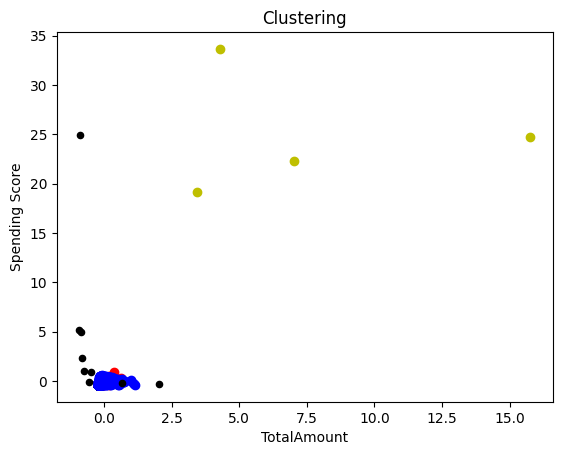

In [48]:
plt.scatter(x.loc[ypred == 0,"TotalAmount"], x.loc[ypred==0, "Frequency"], c = "r", label = "Cluster 1" )
plt.scatter(x.loc[ypred == 1,"TotalAmount"], x.loc[ypred==1, "Frequency"], c = "b",label = "Cluster 2" )
plt.scatter(x.loc[ypred == 2,"TotalAmount"], x.loc[ypred==2, "Frequency"], c = "y" ,label = "Cluster 3")

plt.scatter(centroids[:,0],centroids[:,1], c= "black", s=20, label = "Centroids" )
plt.xlabel("TotalAmount")
plt.ylabel("Spending Score")
plt.title("Clustering")

In [49]:
kmeans = KMeans( n_clusters = 3, init='k-means++',n_init="auto")
kmeans.fit(df_final_scaled)

KMeans(n_clusters=3, n_init='auto')

In [50]:
pred = kmeans.predict(df_final_scaled)
rfm_cluster = df_final.copy()
rfm_cluster['cluster'] = pred

In [51]:
rfm_cluster

,CustomerID,Recency,Frequency,TotalAmount,cluster
0,12346.0,325,1,77183.60,0
1,12347.0,1,182,4310.00,1
2,12348.0,74,31,1797.24,1
3,12349.0,18,73,1757.55,1
4,12350.0,309,17,334.40,0
...,...,...,...,...,...
4333,18280.0,277,10,180.60,0
4334,18281.0,180,7,80.82,0
4335,18282.0,7,12,178.05,1
4336,18283.0,3,721,2045.53,1


<Axes: xlabel='Recency', ylabel='Frequency'>

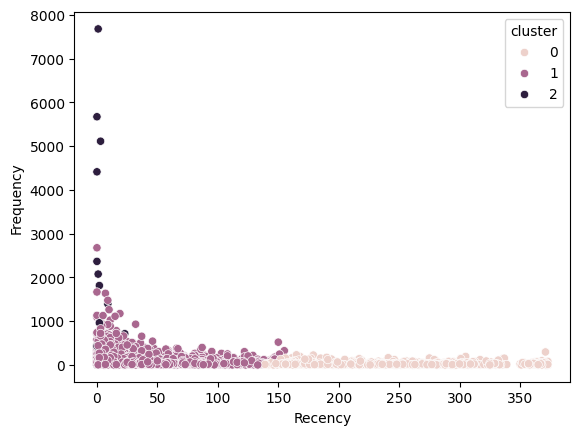

In [52]:
sns.scatterplot(data=rfm_cluster, x="Recency", y="Frequency",hue='cluster')

<Axes: xlabel='cluster', ylabel='Frequency'>

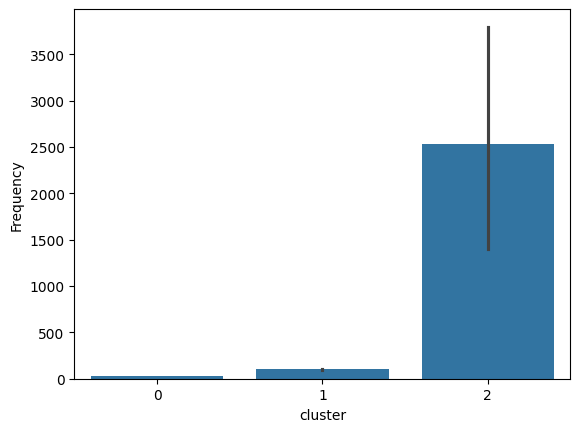

In [53]:
sns.barplot(x='cluster',y='Frequency',data=rfm_cluster)

<Axes: xlabel='cluster', ylabel='Recency'>

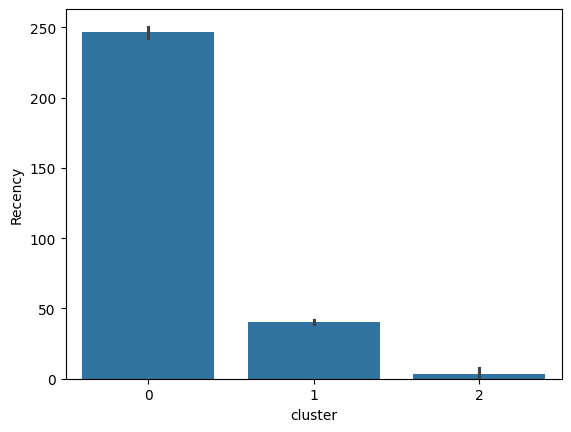

In [54]:
sns.barplot(x='cluster',y='Recency',data=rfm_cluster)

<Axes: xlabel='cluster', ylabel='TotalAmount'>

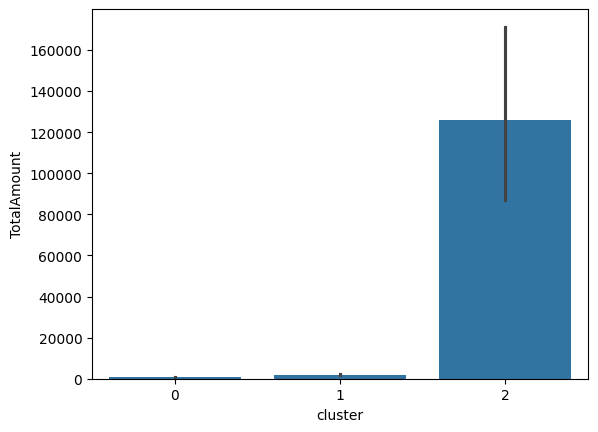

In [55]:
sns.barplot(x='cluster',y='TotalAmount',data=rfm_cluster)

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(2)

In [58]:
reduced_data = pd.DataFrame(pca.fit_transform(df_final_scaled), columns = ["PCA1", "PCA2"])

In [59]:
reduced_data.head()

,PCA1,PCA2
0,4.046772,5.378810
1,0.794074,-0.645572
2,-0.121991,-0.214106
3,0.225604,-0.688452
4,-1.216585,1.826561


In [60]:
kmeans = KMeans(5).fit(reduced_data)
ypred = kmeans.predict(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


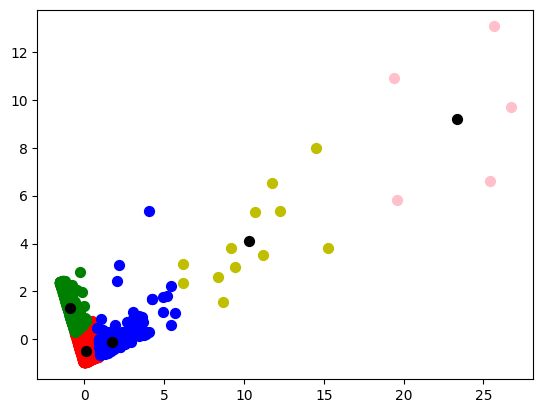

In [61]:
plt.scatter(reduced_data.loc[ypred == 0,"PCA1"],reduced_data.loc[ypred == 0,"PCA2"], c = "r", label = "C1", s=50)
plt.scatter(reduced_data.loc[ypred == 1,"PCA1"],reduced_data.loc[ypred == 1,"PCA2"], c = "g", label = "C2", s=50)
plt.scatter(reduced_data.loc[ypred == 2,"PCA1"],reduced_data.loc[ypred == 2,"PCA2"], c = "y", label = "C3", s=50)
plt.scatter(reduced_data.loc[ypred == 3,"PCA1"],reduced_data.loc[ypred == 3,"PCA2"], c = "b", label = "C4", s=50)
plt.scatter(reduced_data.loc[ypred == 4,"PCA1"],reduced_data.loc[ypred == 4,"PCA2"], c = "pink", label = "C5", s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = "black", label = "C5", s=50)


In [62]:
pred2 = kmeans.predict(reduced_data)
pca_cluster = reduced_data.copy()
pca_cluster['cluster'] = pred2

In [63]:
pca_cluster

,PCA1,PCA2,cluster
0,4.046772,5.378810,3
1,0.794074,-0.645572,0
2,-0.121991,-0.214106,0
3,0.225604,-0.688452,0
4,-1.216585,1.826561,1
...,...,...,...
4333,-1.118465,1.526241,1
4334,-0.741731,0.645975,1
4335,-0.020080,-0.903915,0
4336,2.215618,-0.320982,3


<Axes: xlabel='PCA1', ylabel='PCA2'>

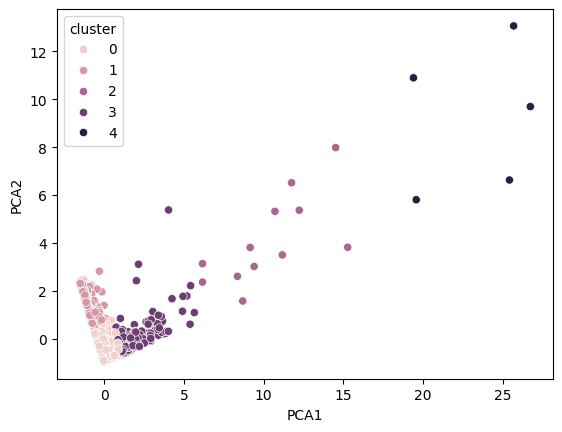

In [64]:
sns.scatterplot(data=pca_cluster, x="PCA1", y="PCA2",hue='cluster')

<Axes: xlabel='cluster', ylabel='PCA1'>

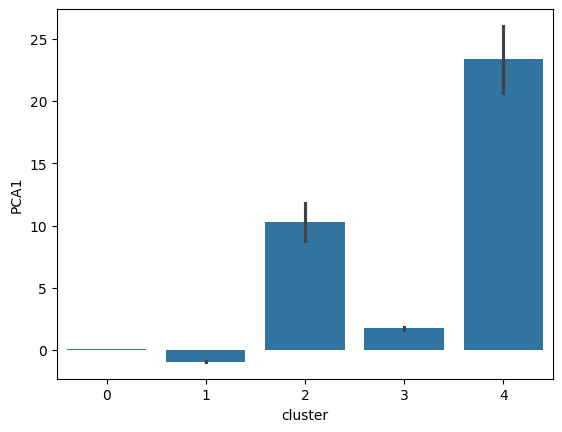

In [65]:
sns.barplot(x='cluster',y='PCA1',data=pca_cluster)

<Axes: xlabel='cluster', ylabel='PCA2'>

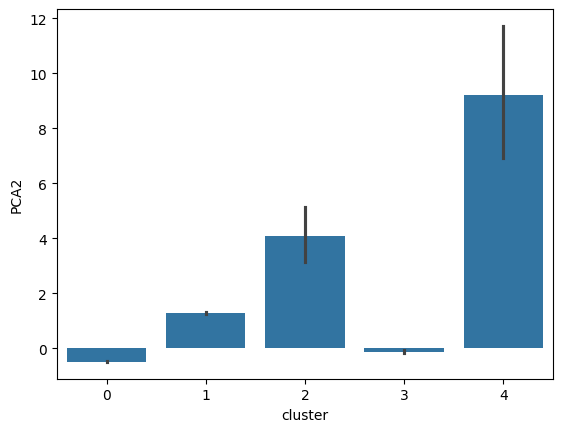

In [66]:
sns.barplot(x='cluster',y='PCA2',data=pca_cluster)